<a class="anchor" id="0"></a>
# **Decision Tree Classifier and Naive Bayes Tutorial with Python**

Dwinda Audia Irnaonefa - 0706022310047

In [138]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### View summary of dataset

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [141]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [142]:
# Checking Missing Values
df.isnull().sum()

ID                            0
Age                           0
Gender                        0
Country                       0
Coffee_Intake                 0
Caffeine_mg                   0
Sleep_Hours                   0
Sleep_Quality                 0
BMI                           0
Heart_Rate                    0
Stress_Level                  0
Physical_Activity_Hours       0
Health_Issues              5941
Occupation                    0
Smoking                       0
Alcohol_Consumption           0
dtype: int64

In [143]:
# Mengubah nilai NaN di Health_Issues menjadi 'None'
df["Health_Issues"] = df["Health_Issues"].fillna("None")

# Cek hasilnya
print(df["Health_Issues"].value_counts())
df["Health_Issues"].isna().sum()



Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64


0

In [144]:
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [145]:
col_names = ['ID', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level', 'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']

for col in col_names:
    print(df[col].value_counts())

ID
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Belgium        497
Australia      497
Germany        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64
Coffee_Intake
0.0    558
2.7    305
2.8    270
2.1    269
2.2    266
      ... 
7.8      2
7.7      2
8.2      1
7.2      1
7.1      1
Name: count, Length: 78, dtype: int64
Caffeine_mg
0.0      528
148.1      9
323.3      9
259.3      9
265.3      9
        ... 
490.6      1
95.3       1
196.8      1
379.0      1
59.1       1
Name: count, Le

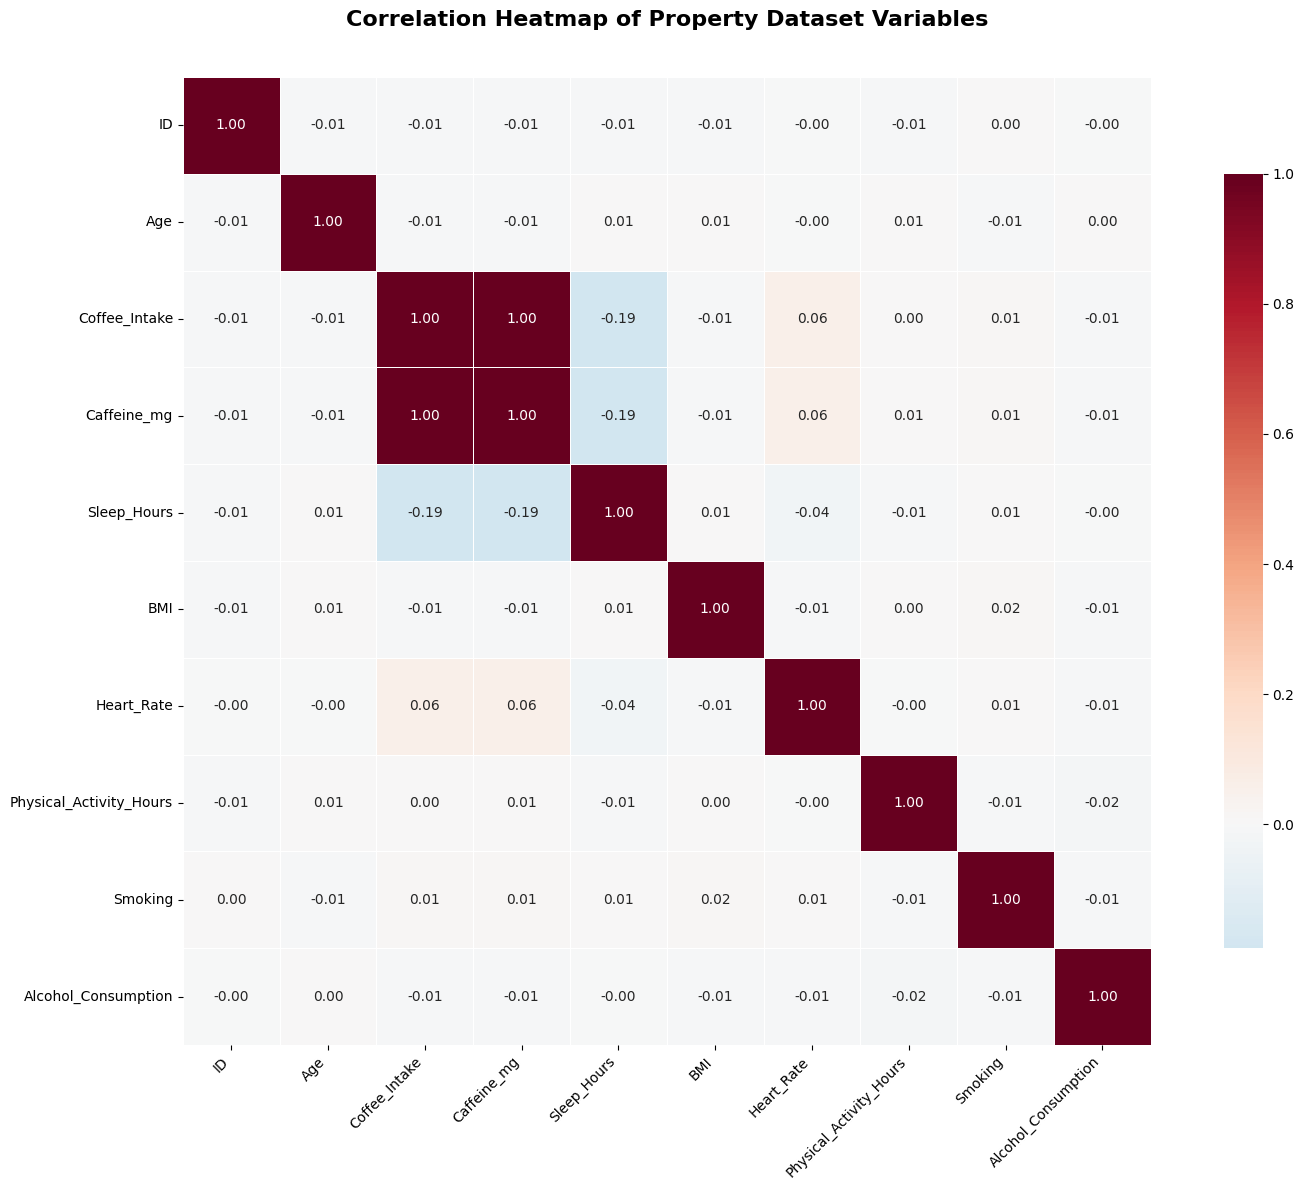

<Axes: title={'center': 'Correlation Heatmap of Property Dataset Variables\n'}>

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 10

# Create correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create heatmap
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      cmap='RdBu_r',
                      center=0,
                      square=True,
                      fmt='.2f',
                      linewidths=0.5,
                      cbar_kws={'shrink': 0.8})

# Customize the plot
plt.title('Correlation Heatmap of Property Dataset Variables\n', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust layout to prevent cutting off labels
plt.tight_layout()
plt.show()


heatmap

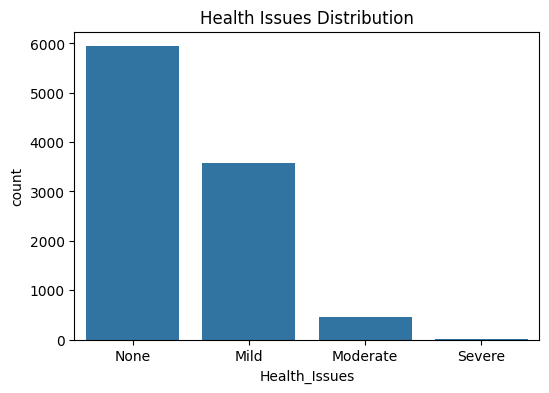

In [147]:
plt.figure(figsize=(6,4))
sns.countplot(x="Health_Issues", data=df)
plt.title("Health Issues Distribution")
plt.show()

Mayoritas responden tidak mengalami masalah kesehatan (None, ~6000 orang).

Sekitar 3500 orang mengalami Mild (ringan).

Moderate (sedang) jumlahnya jauh lebih sedikit (~500 orang).

Severe (berat) sangat jarang (<100 orang).

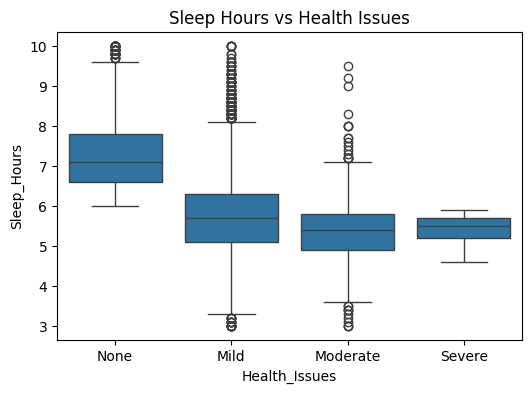

In [148]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Health_Issues", y="Sleep_Hours", data=df)
plt.title("Sleep Hours vs Health Issues")
plt.show()

Orang tanpa masalah kesehatan (None) rata-rata tidur 6–8 jam.

Pada kategori Mild, jam tidur cenderung lebih rendah (~5–6 jam).

Moderate dan Severe punya pola tidur paling buruk, banyak yang hanya 5 jam atau kurang.

Ada outlier tidur terlalu sedikit (3 jam) atau terlalu banyak (10 jam).

Maka semakin sedikit jam tidur, semakin besar kemungkinan seseorang mengalami masalah kesehatan akibat konsumsi kopi.

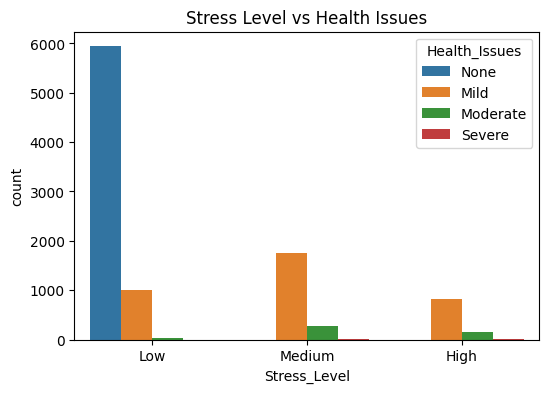

In [149]:
plt.figure(figsize=(6,4))
sns.countplot(x="Stress_Level", hue="Health_Issues", data=df)
plt.title("Stress Level vs Health Issues")
plt.show()

Orang dengan Stress Level Low sebagian besar tidak punya masalah kesehatan (None).

Stress Level Medium banyak dikaitkan dengan masalah Mild dan sebagian Moderate.

Stress Level High juga cenderung menyebabkan Mild, meski jumlahnya lebih sedikit dibanding Medium.

Tingkat stres yang lebih tinggi berkorelasi dengan kemungkinan munculnya masalah kesehatan, walaupun mayoritas kasus yang muncul masih di level ringan.

### Summary of variables

- There are 15 variables in the dataset (after dropping ID).
- The dataset contains a mix of numerical and categorical data types.
- The target variable is Health_Issues.

### Explore `class` variable

In [150]:
df['Health_Issues'].value_counts()

Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [151]:
# check missing values in variables

df.isnull().sum()

ID                         0
Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

We can see that all  the variables are ordinal categorical data type.

### Encode categorical variables


Now, I will encode the categorical variables.

In [152]:
for column in ['ID', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level', 'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']:
  print(df[column].unique())

[    1     2     3 ...  9998  9999 10000]
['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
[3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 5.6 6.7 6.  6.5 6.3 8.2 7.2
 7.  6.6 7.8 6.8 7.7 6.9]
[328.1  94.1 503.7 ... 460.2 509.1  59.1]
[ 7.5  6.2  5.9  7.3  5.3  6.4  7.8  5.5  7.1  8.1  6.5  6.9  6.6  6.8
  7.7  5.7  5.   6.1  6.   8.3  9.2  7.9  4.8  7.4  7.   7.2  5.8  9.4
  7.6  8.   5.4  8.2  6.3  4.5  9.6  5.2  4.7  4.6  8.7  4.9  9.8  6.7
  5.6  8.8  4.2  8.5 10.   8.4  9.3  9.5  3.8  8.6  4.3  5.1  8.9  9.
  3.9  4.1  9.1  4.   9.9  3.   3.5  3.7  3.1  3.6  4.4  9.7  3.4  3.3
  3.2]
['Good' 'Fair' 'Exc

In [153]:
# Drop kolom ID (bukan fitur prediktif)
df = df.drop(columns=["ID"])

gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
country_map = {
    'Germany': 1, 'Brazil': 2, 'Spain': 3, 'Mexico': 4, 'France': 5,
    'Canada': 6, 'UK': 7, 'Switzerland': 8, 'Netherlands': 9, 'Italy': 10,
    'China': 11, 'Japan': 12, 'Belgium': 13, 'Finland': 14, 'Australia': 15,
    'USA': 16, 'Sweden': 17, 'India': 18, 'Norway': 19, 'South Korea': 20
}
sleep_quality_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
occupation_map = {'Other': 1, 'Service': 2, 'Office': 3, 'Student': 4, 'Healthcare': 5}
health_map = {'None': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3}

# Terapkan mapping ke kolom kategorikal
df['Gender'] = df['Gender'].map(gender_map)
df['Country'] = df['Country'].map(country_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_map)
df['Occupation'] = df['Occupation'].map(occupation_map)
df['Health_Issues'] = df['Health_Issues'].map(health_map)

# Cek hasil
df.head()


,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,1,1,3.5,328.1,7.5,3,24.9,78,1,14.5,0,1,0,0
1,33,1,1,1.0,94.1,6.2,3,20.0,67,1,11.0,0,2,0,0
2,42,1,2,5.3,503.7,5.9,2,22.7,59,2,11.2,1,3,0,0
3,53,1,1,2.6,249.2,7.3,3,24.7,71,1,6.6,1,1,0,0
4,32,2,3,3.1,298.0,5.3,2,24.1,76,2,8.5,1,4,0,1


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [154]:
X = df.drop("Health_Issues", axis=1)
y = df["Health_Issues"]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

In [155]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,1,1,3.5,328.1,7.5,3,24.9,78,1,14.5,1,0,0
1,33,1,1,1.0,94.1,6.2,3,20.0,67,1,11.0,2,0,0
2,42,1,2,5.3,503.7,5.9,2,22.7,59,2,11.2,3,0,0
3,53,1,1,2.6,249.2,7.3,3,24.7,71,1,6.6,1,0,0
4,32,2,3,3.1,298.0,5.3,2,24.1,76,2,8.5,4,0,1


In [156]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Health_Issues, dtype: int64

# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [157]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [158]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [159]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,1,3,4.3,405.6,5.4,2,18.0,86,2,2.4,2,0,1
1561,26,1,18,0.0,0.0,5.5,2,28.3,75,2,10.8,1,0,0
1670,32,1,20,2.8,268.1,7.3,3,27.4,69,1,8.6,3,0,0
6087,18,1,20,2.2,208.6,8.1,4,16.3,83,1,8.9,1,0,1
6669,43,2,7,2.6,251.1,9.4,4,25.4,68,1,3.4,3,0,0


In [160]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,1,19,2.6,245.9,6.7,3,30.1,76,1,1.9,2,0,1
4684,22,2,4,3.1,293.1,7.6,3,20.4,69,1,5.0,2,0,0
1731,30,1,15,3.9,372.4,6.4,3,27.5,75,1,13.8,3,0,0
4742,35,1,1,1.0,92.5,5.3,2,23.1,71,2,2.4,2,0,0
4521,47,1,10,1.3,119.0,6.9,3,28.4,64,1,9.6,3,1,0


We now have training and test set ready for model building.

# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [161]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [162]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [163]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [164]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Visualize decision-trees

[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[7] <= 29.95

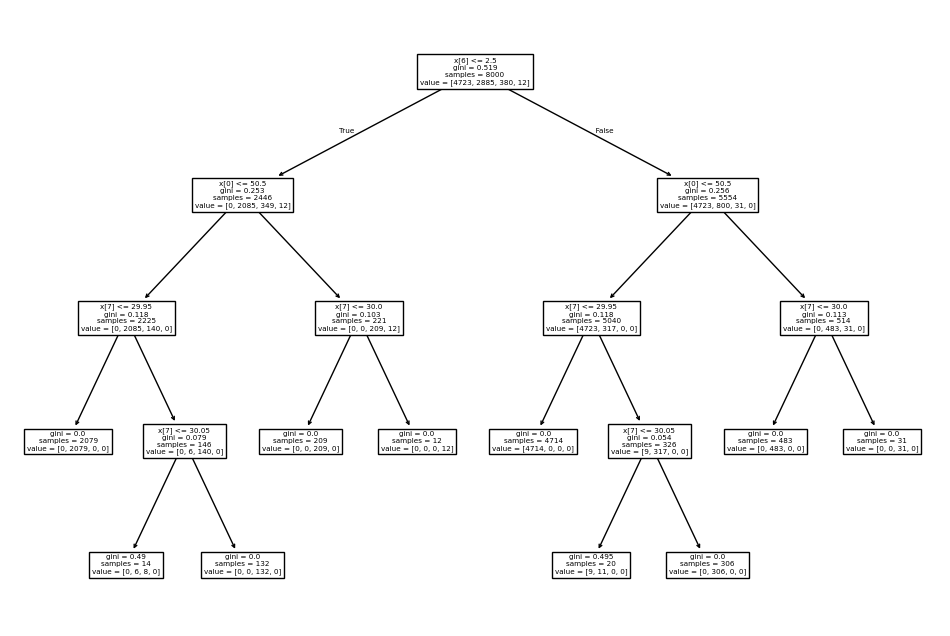

In [165]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [166]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [167]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [168]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


### Visualize decision-trees

[Text(0.5, 0.875, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

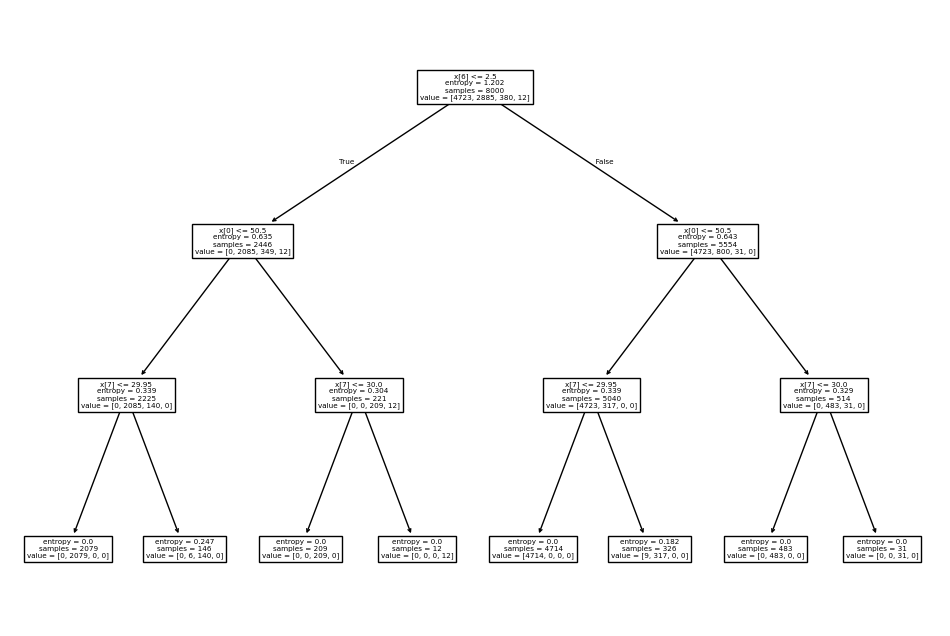

In [169]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [170]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [171]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [172]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8570


Decision Tree (Gini Index) → 0.9965

Decision Tree (Entropy) → 0.9965

Naive Bayes → 0.8570

### Kesimpulan
- Decision Tree (baik Gini maupun Entropy) adalah model terbaik untuk dataset ini.
- Naive Bayes kurang sesuai, meskipun akurasinya masih cukup baik.



# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [173]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [174]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [175]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1218
           1       0.88      0.70      0.78       694
           2       0.71      0.14      0.24        83
           3       0.00      0.00      0.00         5

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.48      2000
weighted avg       0.85      0.86      0.84      2000



In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  int64  
 2   Country                  10000 non-null  int64  
 3   Coffee_Intake            10000 non-null  float64
 4   Caffeine_mg              10000 non-null  float64
 5   Sleep_Hours              10000 non-null  float64
 6   Sleep_Quality            10000 non-null  int64  
 7   BMI                      10000 non-null  float64
 8   Heart_Rate               10000 non-null  int64  
 9   Stress_Level             10000 non-null  int64  
 10  Physical_Activity_Hours  10000 non-null  float64
 11  Health_Issues            10000 non-null  int64  
 12  Occupation               10000 non-null  int64  
 13  Smoking                  10000 non-null  int64  
 14  Alcohol_Consumption    

In [177]:
# Make a prediction with the gini index model

# Input values: buying high, maint low, doors 4, persons 2, lug_boot med, safety low
# These values need to be encoded according to the maps created earlier
new_data = {
'Age': 28,
'Gender': gender_map['Male'],
'Country': country_map['Brazil'],
'Coffee_Intake': 3,
'Caffeine_mg': 280,
'Sleep_Hours': 5,
'Sleep_Quality':sleep_quality_map['Poor'],
'BMI': 25.4,
'Heart_Rate': 85,
'Stress_Level': stress_map['High'],
'Physical_Activity_Hours': 2,
'Occupation': occupation_map['Student'],
'Smoking': '1',
'Alcohol_Consumption': '1'
}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([new_data])

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])

# To get the inverse, we can use the class_map to get the original label
# This was already done in the previous step to print the predicted class.
# class_map = {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}
# class_map.items() → mengembalikan pasangan (key, value) misalnya ('unacc',0).
# {v:k for k,v in class_map.items()} → menukar posisi key & value.
# inv_class_map = {0: 'unacc', 1: 'acc', 2: 'good', 3: 'vgood'}

# reverse dictionary
inverse_prediction_gini = {v:k for k,v in health_map.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")

Prediction: 1
The predicted class for the given input using the gini index model is: Mild


### Kesimpulan

- Kualitas tidur buruk + hanya 5 jam tidur → meningkatkan risiko.
- Stres tinggi memperburuk kondisi.
- Ditambah kebiasaan merokok dan konsumsi alkohol → makin menambah faktor risiko kesehatan.

Model Decision Tree dengan Gini Index memprediksi bahwa individu tersebut berisiko mengalami masalah kesehatan ringan (Mild) akibat kombinasi gaya hidup, pola tidur, dan konsumsi kafein.